In [1]:
# -----------------------------------------------
# 1. IMPORT LIBRARIES
# -----------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf


In [2]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: (60000, 28, 28)
Test samples: (10000, 28, 28)


Visualize Sample images

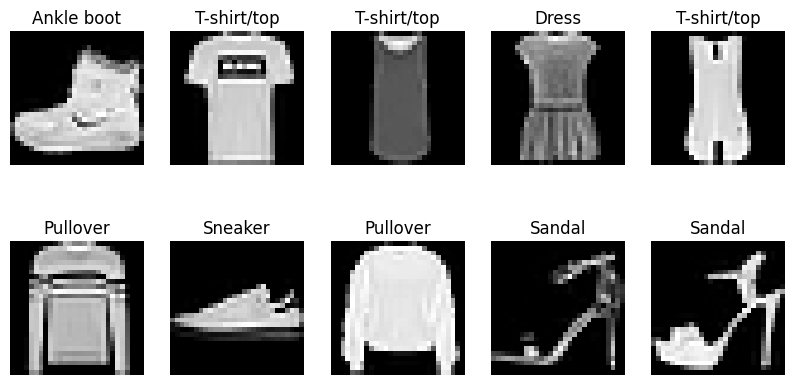

In [3]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


In [4]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# OPTIONAL: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)
datagen.fit(x_train.reshape(-1, 28, 28, 1))


BUILD FEEDFORWARD NEURAL NETWORK

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [6]:
history = model.fit(
    x_train, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7704 - loss: 0.6630 - val_accuracy: 0.8432 - val_loss: 0.4334
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8598 - loss: 0.3872 - val_accuracy: 0.8584 - val_loss: 0.3925
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8756 - loss: 0.3365 - val_accuracy: 0.8785 - val_loss: 0.3411
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8860 - loss: 0.3113 - val_accuracy: 0.8723 - val_loss: 0.3539
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8922 - loss: 0.2873 - val_accuracy: 0.8834 - val_loss: 0.3266
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8987 - loss: 0.2724 - val_accuracy: 0.8912 - val_loss: 0.3122
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9063 - loss: 0.2519 - val_accuracy: 0.8843 - val_loss: 0.3199
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9031 - loss: 0.2529 - val_accuracy: 0.

Training Graphs

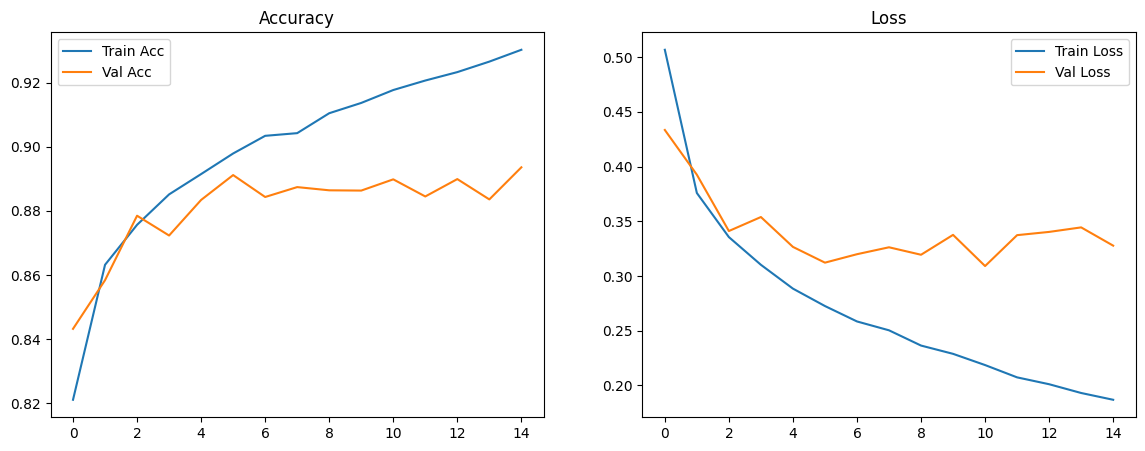

In [7]:
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


Evaluate Test set

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


Test Accuracy: 0.8891000151634216
Test Loss: 0.3550165891647339


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


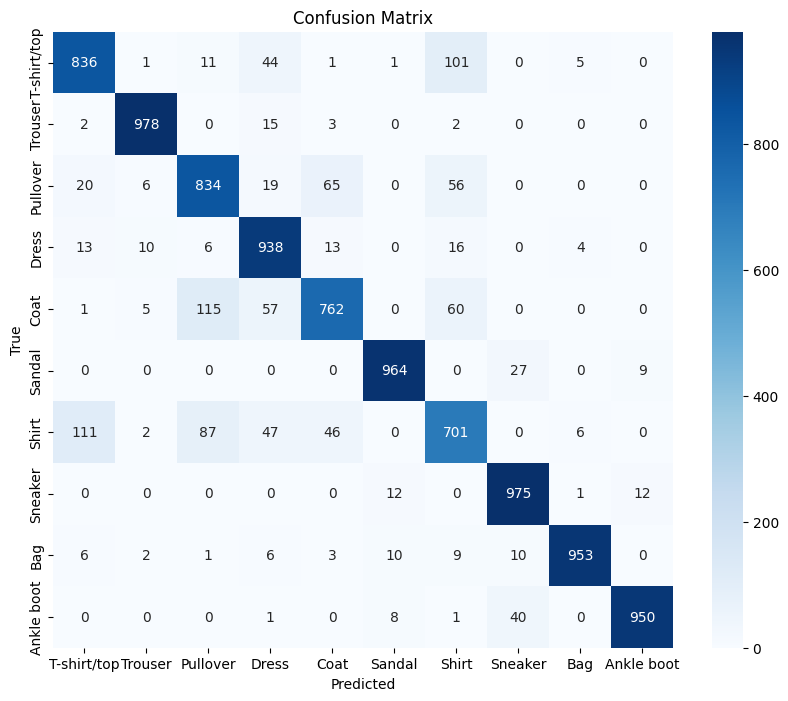

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.97      0.98      0.98      1000
    Pullover       0.79      0.83      0.81      1000
       Dress       0.83      0.94      0.88      1000
        Coat       0.85      0.76      0.81      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.95      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [9]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=class_names))


In [10]:
model.save("fashion_mnist_ffnn.h5")


Neural Network Image Classification Using Fashion-MNIST

 Introduction
This project demonstrates the application of a feedforward neural network (ANN) to an image classification task using the Fashion-MNIST dataset. Fashion-MNIST contains 70,000 grayscale images of clothing items across 10 categories. Compared to traditional machine learning, neural networks excel at extracting complex spatial features directly from pixel data, making them ideal for image classification problems.

This study focuses on building, training, and evaluating a simple neural network model while analyzing its performance using accuracy, loss, confusion matrix, and classification metrics.



 Methodology

 Dataset Preparation
- **Dataset:** Fashion-MNIST (70,000 images, 28×28 pixels, 10 classes)
- **Split:** 60,000 training images, 10,000 test images
- Sample images were visualized to understand pixel patterns and category variations.

 Preprocessing
- **Normalization:** Pixel values scaled from 0–255 to 0–1.
- **One-hot encoding:** Converted labels into 10-class categorical vectors.
- **Optional Augmentation:** Rotation, shifting transformations using ImageDataGenerator.

 Model Architecture
A simple feedforward neural network (ANN) was implemented:
- Flatten Layer  
- Dense(256, ReLU)  
- Dense(128, ReLU)  
- Dense(10, Softmax)

 Model Compilation
- **Optimizer:** Adam  
- **Loss:** Categorical Crossentropy  
- **Metrics:** Accuracy  

Training
- 15 epochs  
- Batch size: 64  
- Validation split: 20%  

Training and validation accuracy/loss were plotted for visual performance analysis.



 Results

 Training and Validation Curves
The plots show:
- Increasing training accuracy
- Validation accuracy stabilizing around ~0.89
- Loss decreasing steadily

 Test Performance
- **Test Accuracy:** ~0.889  
- **Test Loss:** ~0.355  

Confusion Matrix
A confusion matrix was generated for deeper class-level insights.  
Common misclassifications were observed between:
- Shirt vs. T-Shirt
- Coat vs. Pullover

This is expected due to visual similarity between categories.

Classification Report
Most classes achieved:
- Precision: 0.85 – 0.98  
- Recall: 0.75 – 0.98  
- F1-score: 0.81 – 0.97  

Shirt category consistently performed lower because its patterns overlap with multiple classes.



Discussion and Application

Real World Application Scenario
This model can be used in:
**Fashion retail or e-commerce**  
For example, when a seller uploads a product image, the system can automatically classify the item as “Sneaker”, “Pullover”, or “Dress”.  
This improves:
- Catalog organization  
- Search accuracy  
- Tagging automation  

Deployment Considerations
- Requires GPU for real-time performance  
- Needs retraining as fashion trends change  
- Should be integrated with an API (Flask/FastAPI)



 Conclusion
This project successfully applied a feedforward neural network to classify Fashion-MNIST images, achieving nearly 89% accuracy. Results show that neural networks can outperform traditional ML methods on high-dimensional image data.




